In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import scipy.stats as stats

import utils

import importlib
importlib.reload(utils)

import os

# Read Data

In [2]:
#in_dir = '70f80fdf-rounds-10-evidence-1-population-5'
#in_dir = 'abf00068-rounds-10-evidence-4-population-5'
in_dir = 'd75786f7-data-2018-01-25-big-experiment'

#in_dir = 'd9145d2a-rounds-10-evidence-1-population-5'
#in_dir = 'b7d0390f-rounds-10-evidence-4-population-5'

n_evidence = 4

raw_data = pd.read_csv('./data/' + in_dir + '/info.csv')

raw_data = raw_data[raw_data['time_of_death'].isnull()]

data,fails,parts = utils.parse_data(raw_data)

In [66]:
len(raw_data)

1920

In [3]:
#data = data[data['turn'] <= 3]

In [4]:
fails = utils.get_evidence_subset(fails, n_evidence)

In [5]:
data = data[data['net'] > 3]

In [6]:
for i in range(1,11):
    print('Participants on turn ' + str(i) + ':', sum(data['turn'] == i)/4)

Participants on turn 1: 20.0
Participants on turn 2: 20.0
Participants on turn 3: 20.0
Participants on turn 4: 20.0
Participants on turn 5: 20.0
Participants on turn 6: 20.0
Participants on turn 7: 20.0
Participants on turn 8: 20.0
Participants on turn 9: 20.0
Participants on turn 10: 20.0


In [7]:
#data = sim_data

# Analyze Evidence

In [8]:
last_perfs = []
last_pops = []
pops = []
evidences = []
net_evidences = []
final_pops = []
nets = []
probs = []
posteriors = []

num_turns = max(data['turn'])

for net in sorted(set(data['net'])):
    
    raw_evidence,net_evidence,posterior = utils.get_evidence(fails[net])
    
    print('Net', net)
    print(net_evidence[1][:(num_turns-1)])
    print(np.array(net_evidence[num_turns][:(num_turns-1)] * 100,dtype=int)/100.0)
    
    for t in range(num_turns+1):
        
        if t > 1:
            last_perfs += list(net_evidence[num_turns][t-2])
            last_pops += list(mean_pop)
        
        if t > 0:    
            mean_pop = utils.get_pop(data,net,t)
            print(mean_pop)
            
        if t > 1:
            pops += list(mean_pop)

    for window in range(1,num_turns):
        print('Final correlation with last',window,'evidence', np.corrcoef(net_evidence[window][t-2],mean_pop)[0,1])

    evidences += list(net_evidence[1][t-2])
    net_evidences += list(net_evidence[num_turns][t-2])
    final_pops += list(mean_pop)
    nets += [net] * len(list(mean_pop))
    probs += list(parts[net])
    posteriors += list(posterior[num_turns][t-2])

Net 4
[[ 0.5   0.75  0.75  0.25  0.    0.5   0.25  0.25]
 [ 0.5   1.    0.25  0.25  0.75  0.    0.5   0.  ]
 [ 0.5   0.5   0.5   0.25  0.25  0.25  0.25  0.5 ]
 [ 0.    1.    0.75  0.25  0.75  0.5   0.5   0.25]
 [ 0.25  0.75  0.25  0.75  0.75  0.5   0.75  0.5 ]
 [ 0.    0.75  0.75  0.    0.    0.75  0.75  0.5 ]
 [ 0.5   0.75  0.25  0.5   0.75  0.5   0.5   0.5 ]
 [ 0.25  0.5   0.25  0.75  0.5   0.    0.5   0.5 ]
 [ 0.5   0.75  0.    0.25  0.5   0.    0.5   0.25]]
[[ 0.5   0.75  0.75  0.25  0.    0.5   0.25  0.25]
 [ 0.5   0.87  0.5   0.25  0.37  0.25  0.37  0.12]
 [ 0.5   0.75  0.5   0.25  0.33  0.25  0.33  0.25]
 [ 0.37  0.81  0.56  0.25  0.43  0.31  0.37  0.25]
 [ 0.35  0.8   0.5   0.35  0.5   0.35  0.45  0.3 ]
 [ 0.29  0.79  0.54  0.29  0.41  0.41  0.5   0.33]
 [ 0.32  0.78  0.5   0.32  0.46  0.42  0.5   0.35]
 [ 0.31  0.75  0.46  0.37  0.46  0.37  0.5   0.37]
 [ 0.33  0.75  0.41  0.36  0.47  0.33  0.5   0.36]]
[ 0.5   0.65  0.5   0.55  0.6   0.6   0.6   0.7 ]
[ 0.65  0.45  0.55  0.4 

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)



[[ 0.75  1.    0.75  0.75  0.75  0.5   0.25  0.5 ]
 [ 1.    1.    0.5   0.25  0.75  0.75  0.5   0.75]
 [ 0.5   0.25  1.    0.    0.5   0.25  0.5   0.5 ]
 [ 0.75  0.75  0.75  0.25  0.25  1.    0.25  0.75]
 [ 0.25  0.5   0.5   0.5   0.5   0.5   0.75  0.25]
 [ 0.5   0.    0.75  0.5   0.5   0.75  0.5   0.75]
 [ 1.    0.5   0.75  0.5   0.5   0.25  0.5   0.5 ]
 [ 0.5   0.25  0.25  0.5   0.75  0.25  0.25  0.25]
 [ 0.75  0.    0.5   0.25  0.    0.5   0.25  0.75]]
[[ 0.75  1.    0.75  0.75  0.75  0.5   0.25  0.5 ]
 [ 0.87  1.    0.62  0.5   0.75  0.62  0.37  0.62]
 [ 0.75  0.75  0.75  0.33  0.66  0.5   0.41  0.58]
 [ 0.75  0.75  0.75  0.31  0.56  0.62  0.37  0.62]
 [ 0.65  0.7   0.7   0.35  0.55  0.6   0.45  0.55]
 [ 0.62  0.58  0.7   0.37  0.54  0.62  0.45  0.58]
 [ 0.67  0.57  0.71  0.39  0.53  0.57  0.46  0.57]
 [ 0.65  0.53  0.65  0.4   0.56  0.53  0.43  0.53]
 [ 0.66  0.47  0.63  0.38  0.5   0.52  0.41  0.55]]
[ 0.35  0.4   0.45  0.6   0.6   0.55  0.45  0.55]
[ 0.5   0.4   0.35  0.55  0.7

In [9]:
colors = np.array(['']*len(probs))
colors[np.array(probs) > 0.5] = 'blue'
colors[np.array(probs) <= 0.5] = 'red'

In [10]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(evidences,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Last Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [11]:
np.corrcoef(posteriors,final_pops)

array([[ 1.        ,  0.56299404],
       [ 0.56299404,  1.        ]])

In [12]:
np.corrcoef(net_evidences,final_pops)

array([[ 1.        ,  0.55587176],
       [ 0.55587176,  1.        ]])

In [13]:
np.corrcoef(evidences,final_pops)

array([[ 1.        ,  0.52681192],
       [ 0.52681192,  1.        ]])

In [14]:
np.corrcoef([x for i in range(4,8) for x in parts[i]],final_pops)

array([[ 1.        ,  0.48983328],
       [ 0.48983328,  1.        ]])

In [15]:
np.corrcoef([x for net in range(4,8) for x in utils.get_evidence(fails[net])[1][1][num_turns-2] ],final_pops)

/home/appreciate/Dropbox (MIT)/rumor-spreading-modeling/experiments/dallinger/spaceship-v2/utils.py:113: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


array([[ 1.        ,  0.52681192],
       [ 0.52681192,  1.        ]])

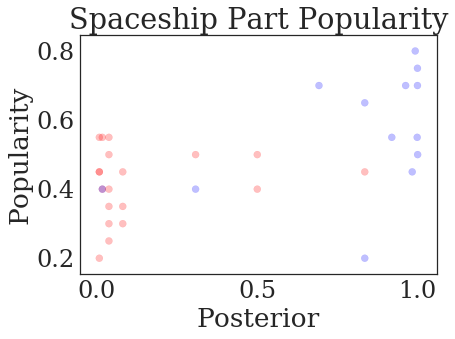

In [16]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(posteriors,final_pops,s=50,alpha=0.25,c=colors)
plt.xlabel('Posterior')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

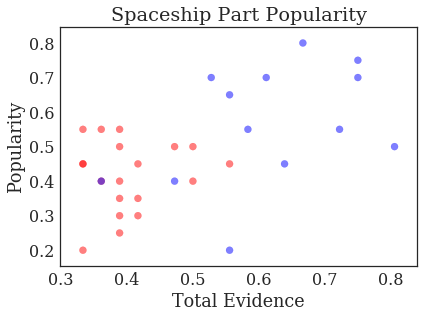

In [56]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.scatter(net_evidences,final_pops,s=50,alpha=0.5,c=colors)
plt.xlabel('Total Evidence')
plt.ylabel('Popularity')
plt.title('Spaceship Part Popularity')
plt.savefig('pop-evidence.jpg', bbox_inches = 'tight')

In [60]:
pd.DataFrame({'evidence':net_evidences,'popularity':final_pops, 'game':nets}).to_csv('evidence-pops.csv')

In [65]:
os.system('Rscript analyze.R > tmp')
with open('tmp') as f:
    for l in f.readlines():
        print(l)



Call:

lm(formula = d[, "evidence"] ~ d[, "popularity"] + d[, "game"])



Residuals:

     Min       1Q   Median       3Q      Max 

-0.20381 -0.07801  0.00133  0.03630  0.31703 



Coefficients:

                  Estimate Std. Error t value Pr(>|t|)   

(Intercept)        0.10927    0.12000   0.911    0.370   

d[, "popularity"]  0.50202    0.13724   3.658    0.001 **

d[, "game"]        0.02565    0.01841   1.393    0.174   

---

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Residual standard error: 0.1163 on 29 degrees of freedom

Multiple R-squared:  0.3523,	Adjusted R-squared:  0.3077 

F-statistic: 7.888 on 2 and 29 DF,  p-value: 0.001839





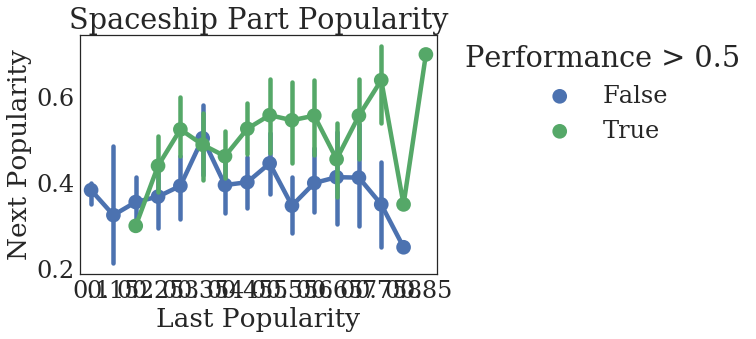

In [18]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot(last_pops,pops,np.array(last_perfs) > 0.5)
plt.xlabel('Last Popularity')
plt.ylabel('Next Popularity')
plt.title('Spaceship Part Popularity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'Performance > 0.5')
#plt.savefig('choice-evidence.jpg', bbox_inches = 'tight')

In [19]:
np.array(pops)[np.array(last_pops) == 0]

array([], dtype=float64)

# Analyze Reward

In [20]:
rewards = []

for net in sorted(set(data['net'])):
    
    rewards += [[]]
    for t in range(num_turns+1):

        if t > 0:
            rewards[-1] += [utils.get_reward(data,parts,net,t)]

rewards = np.transpose(np.array(rewards))

[ 0.5   0.65  0.5   0.55  0.6   0.6   0.6   0.7 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.65  0.45  0.55  0.4   0.35  0.45  0.65  0.55] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.45  0.65  0.25  0.3   0.65  0.2   0.45  0.2 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.6   0.5   0.5   0.45  0.35  0.4   0.25  0.6 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.25  0.55  0.75  0.5   0.65  0.2   0.35  0.2 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.15  0.55  0.35  0.55  0.7   0.3   0.65  0.25] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.25  0.45  0.75  0.2   0.35  0.4   0.6   0.25] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.2   0.45  0.25  0.25  0.5   0.4   0.45  0.4 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.4   0.6   0.5   0.45  0.5   0.3   0.5   0.6 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.45  0.7   0.35  0.4   0.5   0.55  0.5   0.4 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.45  0.4   0.75  0.45  0.4   0.35  0.55  0.55] [-0.1 -0.1  0.1 -0.1 -0.1  0.1

In [21]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.00890625
Turn 2: -0.00984375
Turn 3: 0.000625
Turn 4: -0.0071875
Turn 5: -0.0028125
Turn 6: -0.00671875
Turn 7: -0.00671875
Turn 8: 0.000625
Turn 9: -0.00453125
Turn 10: -0.00171875


In [22]:
rewards

array([[-0.025   , -0.02125 ,  0.008125,  0.0025  ],
       [-0.025625, -0.0225  ,  0.00375 ,  0.005   ],
       [-0.018125, -0.01125 ,  0.019375,  0.0125  ],
       [-0.018125, -0.021875,  0.00625 ,  0.005   ],
       [-0.024375, -0.013125,  0.02    ,  0.00625 ],
       [-0.02375 , -0.02375 ,  0.015   ,  0.005625],
       [-0.023125, -0.025625,  0.01375 ,  0.008125],
       [-0.015   , -0.001875,  0.014375,  0.005   ],
       [-0.018125, -0.010625,  0.00875 ,  0.001875],
       [-0.020625, -0.01375 ,  0.02375 ,  0.00375 ]])

In [23]:
all_rewards = pd.DataFrame([[i,j,r] for i in range(len(rewards)) for j,r in enumerate(rewards[i])])
all_rewards.columns = ['turn','net','reward']

In [24]:
[sum(parts[i] == 0.6) for i in parts]

[3, 2, 5, 2, 2, 2, 5, 4]

In [25]:
-0.1*0.4*6/8 + 0.1*0.6*2/8

-0.015000000000000006

In [26]:
all_rewards.groupby(['turn','net']).mean()

reward
turn net          
0    0   -0.025000
     1   -0.021250
     2    0.008125
     3    0.002500
1    0   -0.025625
     1   -0.022500
     2    0.003750
     3    0.005000
2    0   -0.018125
     1   -0.011250
     2    0.019375
     3    0.012500
3    0   -0.018125
     1   -0.021875
     2    0.006250
     3    0.005000
4    0   -0.024375
     1   -0.013125
     2    0.020000
     3    0.006250
5    0   -0.023750
     1   -0.023750
     2    0.015000
     3    0.005625
6    0   -0.023125
     1   -0.025625
     2    0.013750
     3    0.008125
7    0   -0.015000
     1   -0.001875
     2    0.014375
     3    0.005000
8    0   -0.018125
     1   -0.010625
     2    0.008750
     3    0.001875
9    0   -0.020625
     1   -0.013750
     2    0.023750
     3    0.003750

In [27]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('turn','reward',data=all_rewards,ci=None)
plt.xlabel('Turn')
plt.ylabel('Score')
plt.savefig('score-over-time.jpg', bbox_inches = 'tight')


In [28]:
print(stats.linregress(all_rewards['turn'], all_rewards['reward']))

LinregressResult(slope=0.00060227272727272733, intercept=-0.0074289772727272711, rvalue=0.11208036341889727, pvalue=0.49110338152829713, stderr=0.00086621716426898737)


In [29]:
all_rewards.to_csv('all_rewards.csv')

In [30]:

turn = []
seen = []
perf = []
choice = []
net = []
item = []

for i,row in data.iterrows():
    
    if len(row['viewed']) > 0:
        
        print('----')
        print(row['net'],row['turn'])
        print(row['viewed'])
        print(fails[row['net']][row['turn']-2])
        print(row['action'])
        
        for j in range(len(row['action'])):
            
            these_successes = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'success')
            these_fails = sum(np.array(fails[row['net']][row['turn']-2][j]) == 'fail')
            
            turn += [row['turn']]
            seen += [row['viewed'][j][0] != '0']
            perf += [these_successes - these_fails]
            choice += [row['action'][j]]
            net += [row['net']]
            item += [j]
            
indiv_choices = pd.DataFrame({'turn':turn,'seen':seen,'perf':perf,'choice':choice,'net':net,'item':item})

----
4 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail' 'success' 'fail' 'fail']
 ['fail' 'success' 'fail' 'success']
 ['success' 'success' 'success' 'fail']
 ['success' 'fail' 'success' 'success']
 ['fail' 'fail' 'success' 'fail']
 ['success' 'success' 'fail' 'success']
 ['fail' 'success' 'fail' 'success']
 ['success' 'success' 'success' 'success']]
[1, 1, 1, 1, 1, 1, 1, 1]
----
7 1
[['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0'], ['0', '0', '0', '0']]
[['fail' 'success' 'success' 'success']
 ['fail' 'fail' 'success' 'fail']
 ['success' 'fail' 'success' 'fail']
 ['fail' 'fail' 'fail' 'success']
 ['fail' 'fail' 'success' 'fail']
 ['fail' 'success' 'success' 'success']
 ['fail' 'fail' 'fail' 'success']
 ['success' 'success' 'success' 'fail']]
[1,

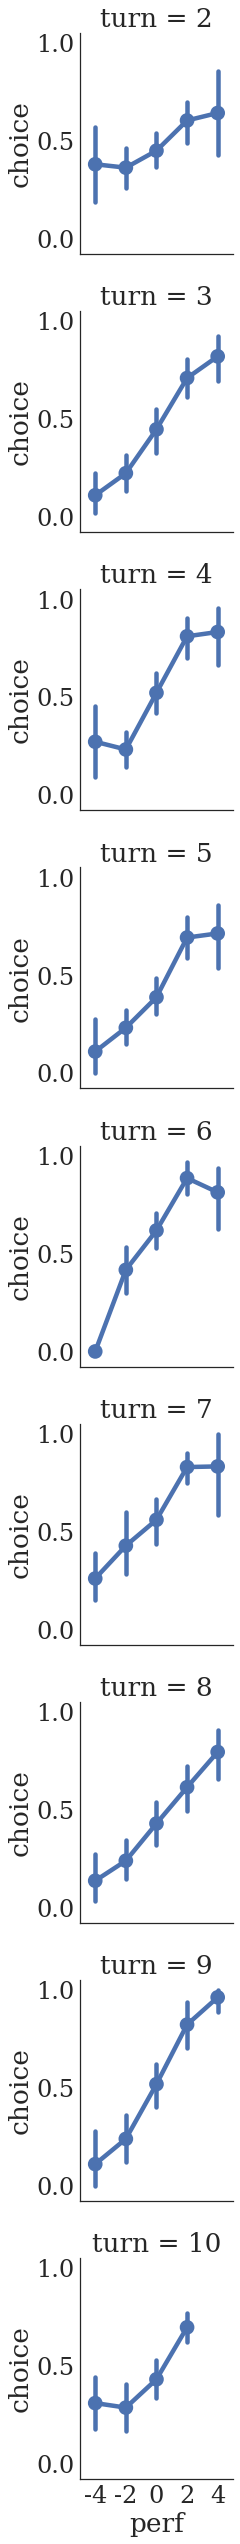

In [31]:
sns.factorplot('perf', 'choice', row = 'turn', data = indiv_choices[seen])


In [32]:
agg = indiv_choices[seen].groupby(['perf','turn','item','net']).mean()
agg

choice  seen
perf turn item net                
-4   2    2    7    0.363636  True
          4    4    0.400000  True
     3    1    5    0.100000  True
          3    5    0.125000  True
          4    7    0.000000  True
          5    4    0.100000  True
          7    4    0.181818  True
     4    2    7    0.000000  True
          3    6    0.750000  True
          5    7    0.214286  True
     5    0    4    0.222222  True
          6    5    0.000000  True
     6    2    7    0.000000  True
     7    0    4    0.000000  True
          1    6    0.272727  True
          3    4    0.125000  True
          4    4    0.384615  True
          6    7    0.230769  True
     8    1    5    0.071429  True
          3    5    0.200000  True
     9    0    5    0.000000  True
          5    4    0.166667  True
          7    5    0.000000  True
     10   1    6    0.416667  True
               7    0.166667  True
          2    4    0.200000  True
          4    6    0.333333  True
          5    4    0.400000  True
-2   2    0    5    0.363636  True
          1    7    0.272727  True
...                      ...   ...
 2   10   0    7    0.733333  True
          1    4    0.769231  True
          2    5    0.687500  True
          3    5    0.500000  True
               7    0.750000  True
          5    5    0.500000  True
          7    6    0.600000  True
               7    0.777778  True
 4   2    1    6    0.555556  True
          5    5    0.800000  True
     3    0    6    0.625000  True
               7    0.857143  True
          1    4    0.888889  True
               6    0.875000  True
     4    0    7    0.750000  True
          2    6    0.916667  True
     5    1    4    0.700000  True
          5    5    0.800000  True
               6    0.750000  True
               7    0.500000  True
     6    2    5    1.000000  True
          6    7    0.666667  True
     7    4    5    0.833333  True
     8    0    6    0.888889  True
          3    7    0.900000  True
          5    5    0.687500  True
          7    7    0.777778  True
     9    0    7    1.000000  True
          2    5    0.928571  True
          3    5    1.000000  True

[287 rows x 2 columns]

In [33]:
np.mean(agg.loc[[-4,-2],:,:,:]['choice'] == 0)

0.17346938775510204

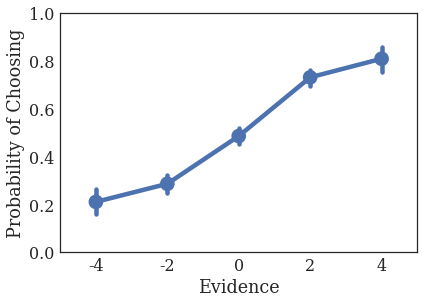

In [34]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.pointplot('perf', 'choice', data = indiv_choices[seen])
plt.ylim(0,1)
plt.xlabel('Evidence')
plt.ylabel('Probability of Choosing')
plt.savefig('response-curve.jpg', bbox_inches = 'tight')

In [35]:
sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
sns.factorplot('turn', 'choice', data = indiv_choices[~np.array(seen)])
plt.xlabel('Turn')
plt.ylabel('Probability of Choosing\nUnseen Part')
plt.ylim(0,1)
plt.savefig('unseen-parts.jpg', bbox_inches = 'tight')

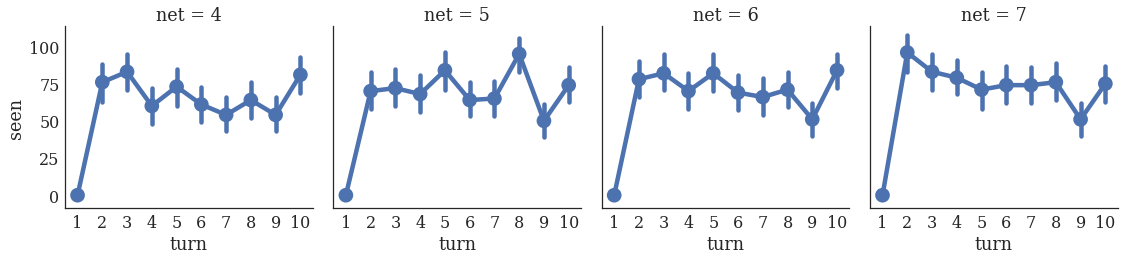

In [36]:
sns.factorplot('turn', 'seen', col = 'net', data = indiv_choices, estimator = sum)

In [37]:
(0.6**3 * 0.4**1)/(0.6**3 * 0.4**1 + 0.4**3 * 0.6**1)

0.6923076923076923

In [38]:
num_turns = max(data['turn'])
num_agents = int(sum(data['turn'] == max(data['turn'])) / len(set(nets)))
num_actions = 8
actions = []

for n in set(nets):
        
    for t in range(num_turns):
        
        this_actions = []
    
        for i in range(num_agents):
            
            action = [n,t,i,[]]
        
            for j in range(num_actions):
                
                if t > 0:
                    viewed_fails = last_actions[np.random.choice(num_agents)]
                    
                if t == 0:
                    choice = np.random.random() < 0.5
                elif not viewed_fails[j]:
                    choice = np.random.random() < 0.5
                else:
                    signal = np.mean(fails[n][t][j] == 'success')
                    if signal == 1.0:
                        choice = np.random.random() < 0.8
                    elif signal == 0.75:
                        choice = np.random.random() < 0.75
                    elif signal == 0.5:
                        choice = np.random.random() < 0.5
                    elif signal == 0.25:
                        choice = np.random.random() < 0.25
                    elif signal == 0.0:
                        choice = np.random.random() < 0.2
                    else:
                        assert False
                    
                action[-1] += [choice]
                
            this_actions += [action[-1]]
            actions += [action]
            
        last_actions = this_actions
            

In [39]:
sim_data = pd.DataFrame(actions)
sim_data.columns = ['net','turn','agent','action']

In [40]:
len(last_actions)

20

In [41]:
sim_rewards = []

for net in sorted(set(data['net'])):
    
    sim_rewards += [[]]
    for t in range(num_turns):
        sim_rewards[-1] += [utils.get_reward(sim_data,parts,net,t)]

sim_rewards = np.transpose(np.array(sim_rewards))

[ 0.55  0.55  0.3   0.6   0.6   0.5   0.7   0.55] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.45  0.6   0.45  0.15  0.45  0.45  0.35  0.4 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.45  0.7   0.45  0.5   0.45  0.25  0.2   0.55] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.35  0.5   0.5   0.45  0.25  0.65  0.5   0.25] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.35  0.7   0.35  0.6   0.7   0.5   0.45  0.4 ] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.3   0.7   0.55  0.45  0.25  0.7   0.95  0.45] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.55  0.7   0.3   0.55  0.7   0.35  0.5   0.45] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.5   0.4   0.4   0.7   0.3   0.45  0.25  0.75] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.4   0.65  0.5   0.45  0.6   0.35  0.8   0.25] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.7   0.7   0.1   0.35  0.75  0.4   0.8   0.35] [-0.1  0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1]
[ 0.25  0.65  0.65  0.5   0.45  0.45  0.45  0.55] [-0.1 -0.1  0.1 -0.1 -0.1  0.1

In [42]:
sim_rewards

array([[-0.026875, -0.021875,  0.016875, -0.001875],
       [-0.01625 , -0.015625,  0.024375,  0.00375 ],
       [-0.013125, -0.015625,  0.010625, -0.00625 ],
       [-0.024375, -0.016875,  0.025   ,  0.005   ],
       [-0.023125, -0.03    ,  0.011875,  0.005   ],
       [-0.025625, -0.023125,  0.02125 ,  0.01    ],
       [-0.0225  , -0.01875 ,  0.00875 ,  0.00375 ],
       [-0.018125, -0.013125,  0.004375, -0.00625 ],
       [-0.0275  , -0.02125 ,  0.01625 ,  0.009375],
       [-0.025625, -0.016875,  0.019375,  0.005625]])

In [43]:
print('Average reward each turn:')
for i,r in enumerate(np.mean(sim_rewards,1)):
    print('Turn ' + str(i+1) + ':', r)

Average reward each turn:
Turn 1: -0.0084375
Turn 2: -0.0009375
Turn 3: -0.00609375
Turn 4: -0.0028125
Turn 5: -0.0090625
Turn 6: -0.004375
Turn 7: -0.0071875
Turn 8: -0.00828125
Turn 9: -0.00578125
Turn 10: -0.004375


In [44]:
all_sim_rewards = pd.DataFrame([[i,j,r] for i in range(len(sim_rewards)) for j,r in enumerate(sim_rewards[i])])
all_sim_rewards.columns = ['turn','net','reward']

In [45]:
sns.factorplot('turn','reward',col='net',data=all_sim_rewards)

In [46]:
print(stats.linregress(all_sim_rewards['turn'], all_sim_rewards['reward']))

LinregressResult(slope=-0.0001013257575757577, intercept=-0.0052784090909090879, rvalue=-0.01743419808534754, pvalue=0.91496740279932842, stderr=0.00094267083955688468)
